In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet   # linear regression model (class)
from sklearn.metrics import mean_squared_error, mean_absolute_error   # accuracy metrics

LONDON_DATA_FILE_GROUPED_TIMESERIES= 'house_prices_london_grouped_timeseries.csv'

In [3]:
df = pd.read_csv(LONDON_DATA_FILE_GROUPED_TIMESERIES, header=0)

In [4]:
#df.dtypes

In [5]:
df.dropna(subset=['Type'], inplace=True)
dummy_df = pd.get_dummies(df['Type'])
df = pd.concat([df, dummy_df], axis=1)
df.drop('Type', axis=1, inplace=True)

In [6]:
#df.head()

In [7]:
#df.dropna(subset=['Postcode_short'], inplace=True)
dummy_df = pd.get_dummies(df['Postcode_short'])
df = pd.concat([df, dummy_df], axis=1)
df.drop('Postcode_short', axis=1, inplace=True)

In [8]:
#df.head()

In [9]:
final_df=df[df['Sold Year']>=1998] #data prior to this has Nan

In [10]:
final_df.shape

(11583, 200)

In [11]:
final_df=final_df.dropna() #drop all rows with Nan

In [12]:
final_df.shape

(10121, 200)

In [13]:
final_df.head(5)

,Sold Price,Sold Year,Sold Price prev year,Sold Price prev year2,Sold Price prev year3,D,F,O,S,T,...,WC1N,WC1R,WC1V,WC1X,WC2A,WC2B,WC2E,WC2H,WC2N,WC2R
12,112995.0,1998,79997.5,63950.0,57995.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,130000.0,1998,149497.5,94000.0,77000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14,118000.0,1998,102000.0,80000.0,81000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,121075.0,1999,112995.0,79997.5,63950.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,140000.0,1999,130000.0,149497.5,94000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
train_df=final_df[final_df['Sold Year']<=2010]
test_df=final_df[final_df['Sold Year']>2010]

In [15]:
train_df.shape

(6489, 200)

In [16]:
test_df.shape

(3632, 200)

In [17]:
X_train=train_df.drop(['Sold Price'],axis=1)
X_train = np.array(X_train)
y_train=train_df['Sold Price'] 
y_train = np.array(y_train)

In [18]:
X_test=test_df.drop(['Sold Price'],axis=1)
X_test = np.array(X_test)
y_test=test_df['Sold Price'] 
y_test = np.array(y_test)

In [19]:
print(X_train.shape)
print(y_train.shape)

(6489, 199)
(6489,)


In [20]:
print(X_test.shape)
print(y_test.shape)

(3632, 199)
(3632,)


In [21]:
model = ElasticNet() 
model.fit(X_train, y_train) 

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
y_pred = model.predict(X_test)

In [26]:
y_actual = y_test #rename to make it easier to understand
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.625986738431
-0.0506978867083
2.64931105194e+12
385476.533501


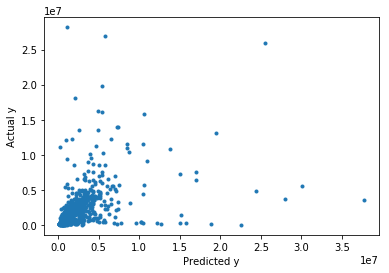

-0.0506978867083


In [27]:
plt.scatter(y_pred, y_test, marker='.')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.show()
print(model.score(X_test, y_test))


In [ ]:
model.coef_ #overfitting as too many features with OLE

y_pred = model.predict(X_test)
y_pred = np.ceil(y_pred) #set ceiling value for y_pred
y_actual = y_test #rename to make it easier to understand
mean_squared_error(y_actual, y_pred) 

# Test R^2
print(model.score(X_test, y_actual))
plt.scatter(y_pred, y_actual, marker='.')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
plt.show()
#output not that useful here


In [ ]:
for a, b in zip(y_pred, y_actual):
    print("Predicted = {0}, Actual = {1}".format(a, b))